In [1]:
import pandas as pd
import numpy as nd
import seaborn as sns
import random
import sklearn
import scikitplot as skplt
%matplotlib inline

In [2]:
read_data = pd.read_csv('600092_data.csv') 
my_copy = read_data.copy()

In [3]:
my_copy

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# Cleaning
## 'Random'
### Has no null values, however there are many duplicates and this attribute has little to no impact

In [4]:
my_copy['Random'].isnull().value_counts()

False    1520
Name: Random, dtype: int64

### Testing for duplicate values

In [5]:
duplicate = my_copy.duplicated(subset = 'Random', keep=False)
duplicate.value_counts()

False    949
True     571
dtype: int64

### Can remove the 'Random' column from the data copy

In [6]:
my_copy = my_copy.drop(columns = ['Random'])
my_copy

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...
1515,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# 'Id' 
### Has no null values and no duplicates

In [7]:
duplicate2 = my_copy.duplicated(subset = 'Id', keep=False)
duplicate2.value_counts()

False    1520
dtype: int64

# 'Indication' 

In [8]:
my_copy['Indication'].isnull().value_counts()

False    1517
True        3
Name: Indication, dtype: int64

In [9]:
my_copy['Indication'].unique()

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

### 'ASx'/'Asx' - graph shows that Asx values should be changed to ASx.

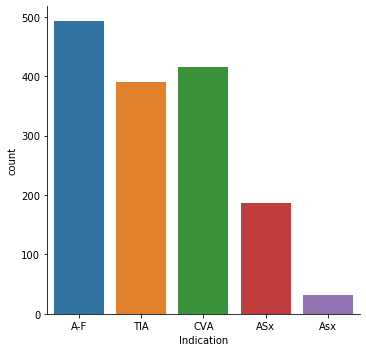

In [10]:
sns.catplot('Indication', data=my_copy, kind='count')

In [11]:
my_copy.loc[(my_copy.Indication == "Asx"), "Indication"] = "ASx"

In [12]:
my_copy.loc[(my_copy.Indication.isnull())]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
822,205845,NaN,no,yes,no,no,no,80.0,100,Risk
1007,256076,NaN,no,no,no,yes,yes,99.0,100,Risk


### For filling in the 1st Indication NaN value

In [13]:
temp = my_copy.loc[(my_copy.Diabetes == "no") 
                  & (my_copy.IHD == "yes")
                  & (my_copy.Hypertension == "yes")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "NoRisk")]
temp["Indication"].value_counts()

TIA    48
CVA    38
A-F    31
ASx     8
Name: Indication, dtype: int64

In [14]:
my_copy.loc[(my_copy.Id == 261060), "Indication"] = "TIA"

### For filling in the 2nd Indication NaN value

In [15]:
temp = my_copy.loc[(my_copy.Diabetes == "no") 
                  & (my_copy.IHD == "yes")
                  & (my_copy.Hypertension == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "Risk")]
temp["Indication"].value_counts()

A-F    11
TIA     7
Name: Indication, dtype: int64

In [16]:
my_copy.loc[(my_copy.Id == 205845), "Indication"] = "A-F"

### For filling in the 3rd Indication NaN value

In [17]:
temp = my_copy.loc[(my_copy.Diabetes == "no") 
                  & (my_copy.IHD == "no")
                  & (my_copy.Hypertension == "no")
                  & (my_copy.Arrhythmia == "yes")
                  & (my_copy.History == "yes")
                  & (my_copy.label == "Risk")]
temp["Indication"].value_counts()

CVA    4
Name: Indication, dtype: int64

In [18]:
my_copy.loc[(my_copy.Id == 256076), "Indication"] = "CVA"

# 'Diabetes' 
### has nan values

In [19]:
my_copy['Diabetes'].isnull().value_counts()

False    1518
True        2
Name: Diabetes, dtype: int64

In [20]:
my_copy.loc[(my_copy.Diabetes.isnull())]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


### For filling in the 1st Diabetes NaN value

In [21]:
temp = my_copy.loc[(my_copy.Indication == "CVA") 
                  & (my_copy.IHD == "yes")
                  & (my_copy.Hypertension == "yes")
                  & (my_copy.Arrhythmia == "yes")
                  & (my_copy.History == "no")
                  & (my_copy.label == "Risk")]
temp["Diabetes"].value_counts()

no     67
yes     2
Name: Diabetes, dtype: int64

In [22]:
my_copy.loc[(my_copy.Id == 224257), "Diabetes"] = "no"

### For filling in the 2nd Diabetes NaN value

In [23]:
temp = my_copy.loc[(my_copy.Indication == "A-F") 
                  & (my_copy.IHD == "no")
                  & (my_copy.Hypertension == "yes")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "NoRisk")]
temp["Diabetes"].value_counts()

no    50
Name: Diabetes, dtype: int64

In [24]:
my_copy.loc[(my_copy.Id == 210861), "Diabetes"] = "no"

# 'IHD' 
### has only 'no' / 'yes' values --no nan values

In [25]:
my_copy['IHD'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
my_copy['IHD'].describe()

count     1520
unique       2
top         no
freq       801
Name: IHD, dtype: object

# 'Hypertension' 
### has nan values

In [27]:
my_copy['Hypertension'].isnull().value_counts()

False    1517
True        3
Name: Hypertension, dtype: int64

In [28]:
my_copy.loc[(my_copy.Hypertension.isnull())]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
590,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
983,158024,TIA,no,no,NaN,no,no,75.0,75,NoRisk


### For filling in the 1st Hypertension NaN value

In [29]:
temp = my_copy.loc[(my_copy.Indication == "CVA")
                  & (my_copy.Diabetes == "yes")
                  & (my_copy.IHD == "no")
                  & (my_copy.Arrhythmia == "yes")
                  & (my_copy.History == "no")
                  & (my_copy.label == "Risk")]
temp["Hypertension"].value_counts()

yes    4
Name: Hypertension, dtype: int64

In [30]:
my_copy.loc[(my_copy.Id == 240232), "Hypertension"] = "yes"

### For filling in the 2nd Hypertension NaN value

In [31]:
temp = my_copy.loc[(my_copy.Indication == "A-F")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "NoRisk")]
temp["Hypertension"].value_counts()

no     117
yes     51
Name: Hypertension, dtype: int64

In [32]:
my_copy.loc[(my_copy.Id == 289096), "Hypertension"] = "no"

### For filling in the 3rd Hypertension NaN value

In [33]:
temp = my_copy.loc[(my_copy.Indication == "TIA")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "NoRisk")]
temp["Hypertension"].value_counts()

no     111
yes     76
Name: Hypertension, dtype: int64

In [34]:
my_copy.loc[(my_copy.Id == 158024), "Hypertension"] = "no"

# 'Arrhythmia' 
### has only 'no' / 'yes' values

In [35]:
my_copy['Arrhythmia'].isnull().value_counts()

False    1520
Name: Arrhythmia, dtype: int64

# 'History' 
### has nan values

In [36]:
my_copy.loc[(my_copy.History.isnull())]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
784,196483,CVA,no,no,yes,yes,NaN,95.0,100,Risk


### For filling in the 1st History NaN value

In [37]:
temp = my_copy.loc[(my_copy.Indication == "CVA")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "yes")
                  & (my_copy.Hypertension == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.label == "NoRisk")]
temp["History"].value_counts()

no     55
yes     2
Name: History, dtype: int64

In [38]:
my_copy.loc[(my_copy.Id == 260770), "History"] = "no"

### For filling in the 2nd History NaN value

In [39]:
temp = my_copy.loc[(my_copy.Indication == "CVA")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "no")
                  & (my_copy.Hypertension == "yes")
                  & (my_copy.Arrhythmia == "yes")
                  & (my_copy.label == "Risk")]
temp["History"].value_counts()

no    34
Name: History, dtype: int64

In [40]:
my_copy.loc[(my_copy.Id == 196483), "History"] = "no"

# 'IPSI'
### has null values & needs changing from a float to an int.

In [41]:
my_copy.loc[(my_copy.IPSI.isnull())]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,227779,A-F,no,no,no,no,no,NaN,100,Risk
752,146415,CVA,no,yes,yes,yes,no,NaN,100,Risk
845,104176,CVA,no,no,no,no,no,NaN,20,NoRisk
916,281679,A-F,no,no,no,no,no,NaN,50,NoRisk


### 1st NaN value

In [42]:
temp = my_copy.loc[(my_copy.Indication == "A-F")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "no")
                  & (my_copy.Hypertension == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "Risk")
                  & (my_copy.Contra == "100")]
mean = temp["IPSI"].mean()
temp

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
18,284552,A-F,no,no,no,no,no,75.0,100,Risk
70,234034,A-F,no,no,no,no,no,85.0,100,Risk
94,139633,A-F,no,no,no,no,no,85.0,100,Risk
178,191092,A-F,no,no,no,no,no,80.0,100,Risk
483,227626,A-F,no,no,no,no,no,75.0,100,Risk
620,227779,A-F,no,no,no,no,no,NaN,100,Risk
883,188400,A-F,no,no,no,no,no,80.0,100,Risk
1240,238474,A-F,no,no,no,no,no,80.0,100,Risk


In [43]:
my_copy.loc[(my_copy.Id == 227779), "IPSI"] = int(mean)
my_copy.loc[(my_copy.Id == 227779)]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,227779,A-F,no,no,no,no,no,80.0,100,Risk


### 2nd NaN value

In [44]:
temp = my_copy.loc[(my_copy.Indication == "CVA")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "yes")
                  & (my_copy.Hypertension == "yes")
                  & (my_copy.Arrhythmia == "yes")
                  & (my_copy.History == "no")
                  & (my_copy.label == "Risk")
                  & (my_copy.Contra == "100")]
mean = temp["IPSI"].mean()
temp

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
15,219417,CVA,no,yes,yes,yes,no,90.0,100,Risk
104,217261,CVA,no,yes,yes,yes,no,90.0,100,Risk
161,196834,CVA,no,yes,yes,yes,no,90.0,100,Risk
182,97917,CVA,no,yes,yes,yes,no,90.0,100,Risk
230,141091,CVA,no,yes,yes,yes,no,90.0,100,Risk
241,210166,CVA,no,yes,yes,yes,no,85.0,100,Risk
257,271690,CVA,no,yes,yes,yes,no,90.0,100,Risk
268,270141,CVA,no,yes,yes,yes,no,90.0,100,Risk
271,186277,CVA,no,yes,yes,yes,no,90.0,100,Risk
314,123618,CVA,no,yes,yes,yes,no,70.0,100,Risk


In [45]:
my_copy.loc[(my_copy.Id == 146415), "IPSI"] = int(mean)

### 3rd NaN value

In [46]:
temp = my_copy.loc[(my_copy.Indication == "CVA")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "no")
                  & (my_copy.Hypertension == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "NoRisk")]
mean = temp["IPSI"].mean()
temp

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
4,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
7,261057,CVA,no,no,no,no,no,75.0,60,NoRisk
23,195912,CVA,no,no,no,no,no,68.0,60,NoRisk
30,104010,CVA,no,no,no,no,no,99.0,60,NoRisk
48,86596,CVA,no,no,no,no,no,75.0,100,NoRisk
...,...,...,...,...,...,...,...,...,...,...
1489,154089,CVA,no,no,no,no,no,70.0,70,NoRisk
1491,207613,CVA,no,no,no,no,no,68.0,100,NoRisk
1501,195147,CVA,no,no,no,no,no,70.0,90,NoRisk
1503,141435,CVA,no,no,no,no,no,95.0,30,NoRisk


In [47]:
my_copy.loc[(my_copy.Id == 104176), "IPSI"] = int(mean)

### 4th NaN value

In [48]:
temp = my_copy.loc[(my_copy.Indication == "A-F")
                  & (my_copy.Diabetes == "no")
                  & (my_copy.IHD == "no")
                  & (my_copy.Hypertension == "no")
                  & (my_copy.Arrhythmia == "no")
                  & (my_copy.History == "no")
                  & (my_copy.label == "NoRisk")]
mean = temp["IPSI"].mean()
temp

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
29,104062,A-F,no,no,no,no,no,78.0,30,NoRisk
40,91068,A-F,no,no,no,no,no,70.0,20,NoRisk
63,210968,A-F,no,no,no,no,no,75.0,30,NoRisk
66,154412,A-F,no,no,no,no,no,70.0,20,NoRisk
77,277279,A-F,no,no,no,no,no,74.0,50,NoRisk
...,...,...,...,...,...,...,...,...,...,...
1449,172519,A-F,no,no,no,no,no,82.0,30,NoRisk
1461,167350,A-F,no,no,no,no,no,95.0,20,NoRisk
1483,83632,A-F,no,no,no,no,no,75.0,55,NoRisk
1486,95434,A-F,no,no,no,no,no,90.0,50,NoRisk


In [49]:
my_copy.loc[(my_copy.Id == 281679), "IPSI"] = int(mean)

In [50]:
my_copy = my_copy.astype({"IPSI": int})

# 'Contra'
### as there is an empty whitespace string value,  -- data type needs changing from 'object' to 'int'

In [51]:
my_copy.Contra.unique()

array(['20 ', '60 ', '40', '85', '95', '100', '50', '50 ', '30 ', '40 ',
       '80', '25 ', '75 ', '10 ', '70 ', '15 ', '75', '35 ', '30', '80 ',
       '55 ', '100 ', '90', '85 ', '79', '45 ', '65 ', '90 ', '62', '53',
       '51 ', '70', '60', '35', '55', '16 ', '73 ', ' ', '10', '20', '65'],
      dtype=object)

In [52]:
my_copy.loc[(my_copy.Contra == " ")]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,254469,ASx,no,no,yes,no,no,70,,NoRisk


In [53]:
temp = my_copy.loc[(my_copy['Indication'] == "ASx") &
                      (my_copy['Diabetes'] == "no") &
                       (my_copy['IHD'] == "no") &
                       (my_copy['Hypertension'] == "yes") &
                       (my_copy['Arrhythmia'] == "no") &
                       (my_copy['History'] == "no") &
                       (my_copy['IPSI'] == 70) &
                       (my_copy['label'] == "NoRisk")
                      ]
temp

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
60,232028,ASx,no,no,yes,no,no,70,60,NoRisk
453,254469,ASx,no,no,yes,no,no,70,,NoRisk
580,294555,ASx,no,no,yes,no,no,70,60,NoRisk
605,173263,ASx,no,no,yes,no,no,70,60,NoRisk
1372,101064,ASx,no,no,yes,no,no,70,60,NoRisk
1423,177127,ASx,no,no,yes,no,no,70,60,NoRisk


### All matching rows have a Contra value of 60 so it makes sense to impute the missing value as this

In [54]:
my_copy.loc[(my_copy.Contra == " "), "Contra"]="60"

In [55]:
my_copy = my_copy.astype({"Contra": int})
my_copy["Contra"]

0       20
1       60
2       40
3       85
4       20
        ..
1515    60
1516    75
1517    20
1518    45
1519    20
Name: Contra, Length: 1520, dtype: int32

# 'Label'
### has unknown values and also nan values

In [56]:
unk_risk = my_copy.loc[(my_copy['label'] == "Unknown")]
null_risk = my_copy.loc[(my_copy.label.isnull())]
unk_risk.append(null_risk)

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,173791,ASx,no,yes,yes,no,no,70,55,Unknown
523,283846,CVA,no,no,yes,yes,no,95,100,Unknown
812,190671,CVA,no,yes,yes,no,no,76,50,NaN
974,165432,CVA,no,yes,yes,yes,no,80,70,NaN
1418,169726,TIA,yes,no,no,no,yes,90,50,NaN


### Drop the rows which have an unknown or null label (risk) value. These rows can be used for testing at the end.

In [57]:
my_copy = my_copy.drop([475, 523, 812, 974, 1418])

### The Id column can also now be dropped as we no longer need it for identifying rows and it is not useful for modelling

In [58]:
my_copy = my_copy.drop(columns = ["Id"])

### Min-Max normalizing the IPSI values


In [59]:
IPSI = my_copy['IPSI']
I_min = IPSI.min()
I_max = IPSI.max()

my_copy['IPSI'] = (IPSI - I_min) / (I_max - I_min)
my_copy['IPSI'].describe()

count    1515.000000
mean        0.685355
std         0.158631
min         0.000000
25%         0.593750
50%         0.656250
75%         0.781250
max         1.000000
Name: IPSI, dtype: float64

### Min-Max normalizing the Contra values

In [60]:
Contra = my_copy['Contra']
C_min = Contra.min()
C_max = Contra.max()

my_copy['Contra'] = (Contra - C_min) / (C_max - C_min)
my_copy['Contra'].describe()

count    1515.000000
mean        0.520037
std         0.328344
min         0.000000
25%         0.222222
50%         0.444444
75%         0.833333
max         1.000000
Name: Contra, dtype: float64

### Z-Score normalizing the IPSI values - (Set as a markdown cell so the code doesnt run)

IPSI = my_copy['IPSI']
I_mean = IPSI.mean()
I_std = IPSI.std(ddof=0)

my_copy['IPSI'] = (IPSI - I_mean) / I_std
### Z-Score normalizing the Contra values - (Set as a markdown cell so the code doesnt run)

Contra = my_copy['IPSI']
C_mean = Contra.mean()
C_std = Contra.std(ddof=0)

my_copy['Contra'] = (Contra - C_mean) / C_std

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Modelling
### Splitting the data into x and y, with y being the label column and x the rest of the columns.

In [61]:
Y = my_copy['label']
X = my_copy.drop(columns = "label")

### Getting the dummy variables for Indication, Diabetes, IHD, Hypertension, Arrhythmia and History

In [62]:
Ind = pd.get_dummies(X.Indication)
Dia = pd.get_dummies(X.Diabetes, prefix='Dia')
Ihd = pd.get_dummies(X.IHD, prefix='IHD')
Hyp = pd.get_dummies(X.Hypertension, prefix='Hyp')
Arr = pd.get_dummies(X.Arrhythmia, prefix='Arr')
His = pd.get_dummies(X.History, prefix='His')

X = X.drop(columns = ["Indication", "Diabetes", "IHD", "Hypertension", 
                 "Arrhythmia", "History"])
X = pd.concat([X, Ind, Dia, Hyp, Arr, His], axis=1)
X.head()

,IPSI,Contra,A-F,ASx,CVA,TIA,Dia_no,Dia_yes,Hyp_no,Hyp_yes,Arr_no,Arr_yes,His_no,His_yes
0,0.671875,0.111111,1,0,0,0,1,0,0,1,1,0,1,0
1,0.546875,0.555556,0,0,0,1,1,0,1,0,1,0,1,0
2,0.937500,0.333333,1,0,0,0,1,0,0,1,1,0,1,0
3,0.859375,0.833333,0,0,0,1,1,0,0,1,1,0,1,0
4,0.546875,0.111111,0,0,1,0,1,0,1,0,1,0,1,0


### Split the data in a 70-30 random train-test split

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    shuffle=True)

## MLP Classifier

In [64]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', activation='logistic', 
                      max_iter=500000, hidden_layer_sizes=(10, 10))

In [65]:
trained_model = model.fit(X_train, Y_train)

In [66]:
pred_y = trained_model.predict(X_test)

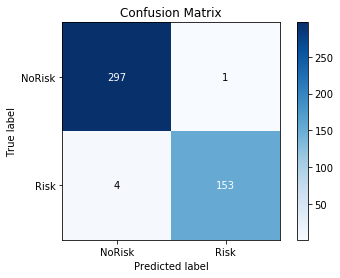

In [67]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    pred_y
)

In [68]:
acc = sklearn.metrics.accuracy_score(Y_test, pred_y, 
                               normalize=True, sample_weight=None)
print("MLP accuracy score:", acc)

MLP accuracy score: 0.989010989010989


# Decision Trees

In [69]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [70]:
model2 = model2.fit(X_train, Y_train)

### Plot the tree

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,40)

[Text(1567.1489361702127, 2090.769230769231, 'X[11] <= 0.5\ngini = 0.442\nsamples = 1060\nvalue = [710, 350]'),
 Text(1092.2553191489362, 1923.5076923076924, 'X[1] <= 0.711\ngini = 0.273\nsamples = 840\nvalue = [703, 137]'),
 Text(688.5957446808511, 1756.246153846154, 'X[0] <= 0.82\ngini = 0.114\nsamples = 659\nvalue = [619, 40]'),
 Text(379.9148936170213, 1588.9846153846156, 'X[1] <= 0.567\ngini = 0.068\nsamples = 597\nvalue = [576, 21]'),
 Text(189.95744680851064, 1421.7230769230769, 'X[7] <= 0.5\ngini = 0.039\nsamples = 549\nvalue = [538, 11]'),
 Text(94.97872340425532, 1254.4615384615386, 'X[2] <= 0.5\ngini = 0.033\nsamples = 544\nvalue = [535, 9]'),
 Text(47.48936170212766, 1087.2, 'gini = 0.0\nsamples = 373\nvalue = [373, 0]'),
 Text(142.46808510638297, 1087.2, 'X[9] <= 0.5\ngini = 0.1\nsamples = 171\nvalue = [162, 9]'),
 Text(94.97872340425532, 919.9384615384615, 'gini = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(189.95744680851064, 919.9384615384615, 'X[1] <= 0.194\ngini = 0

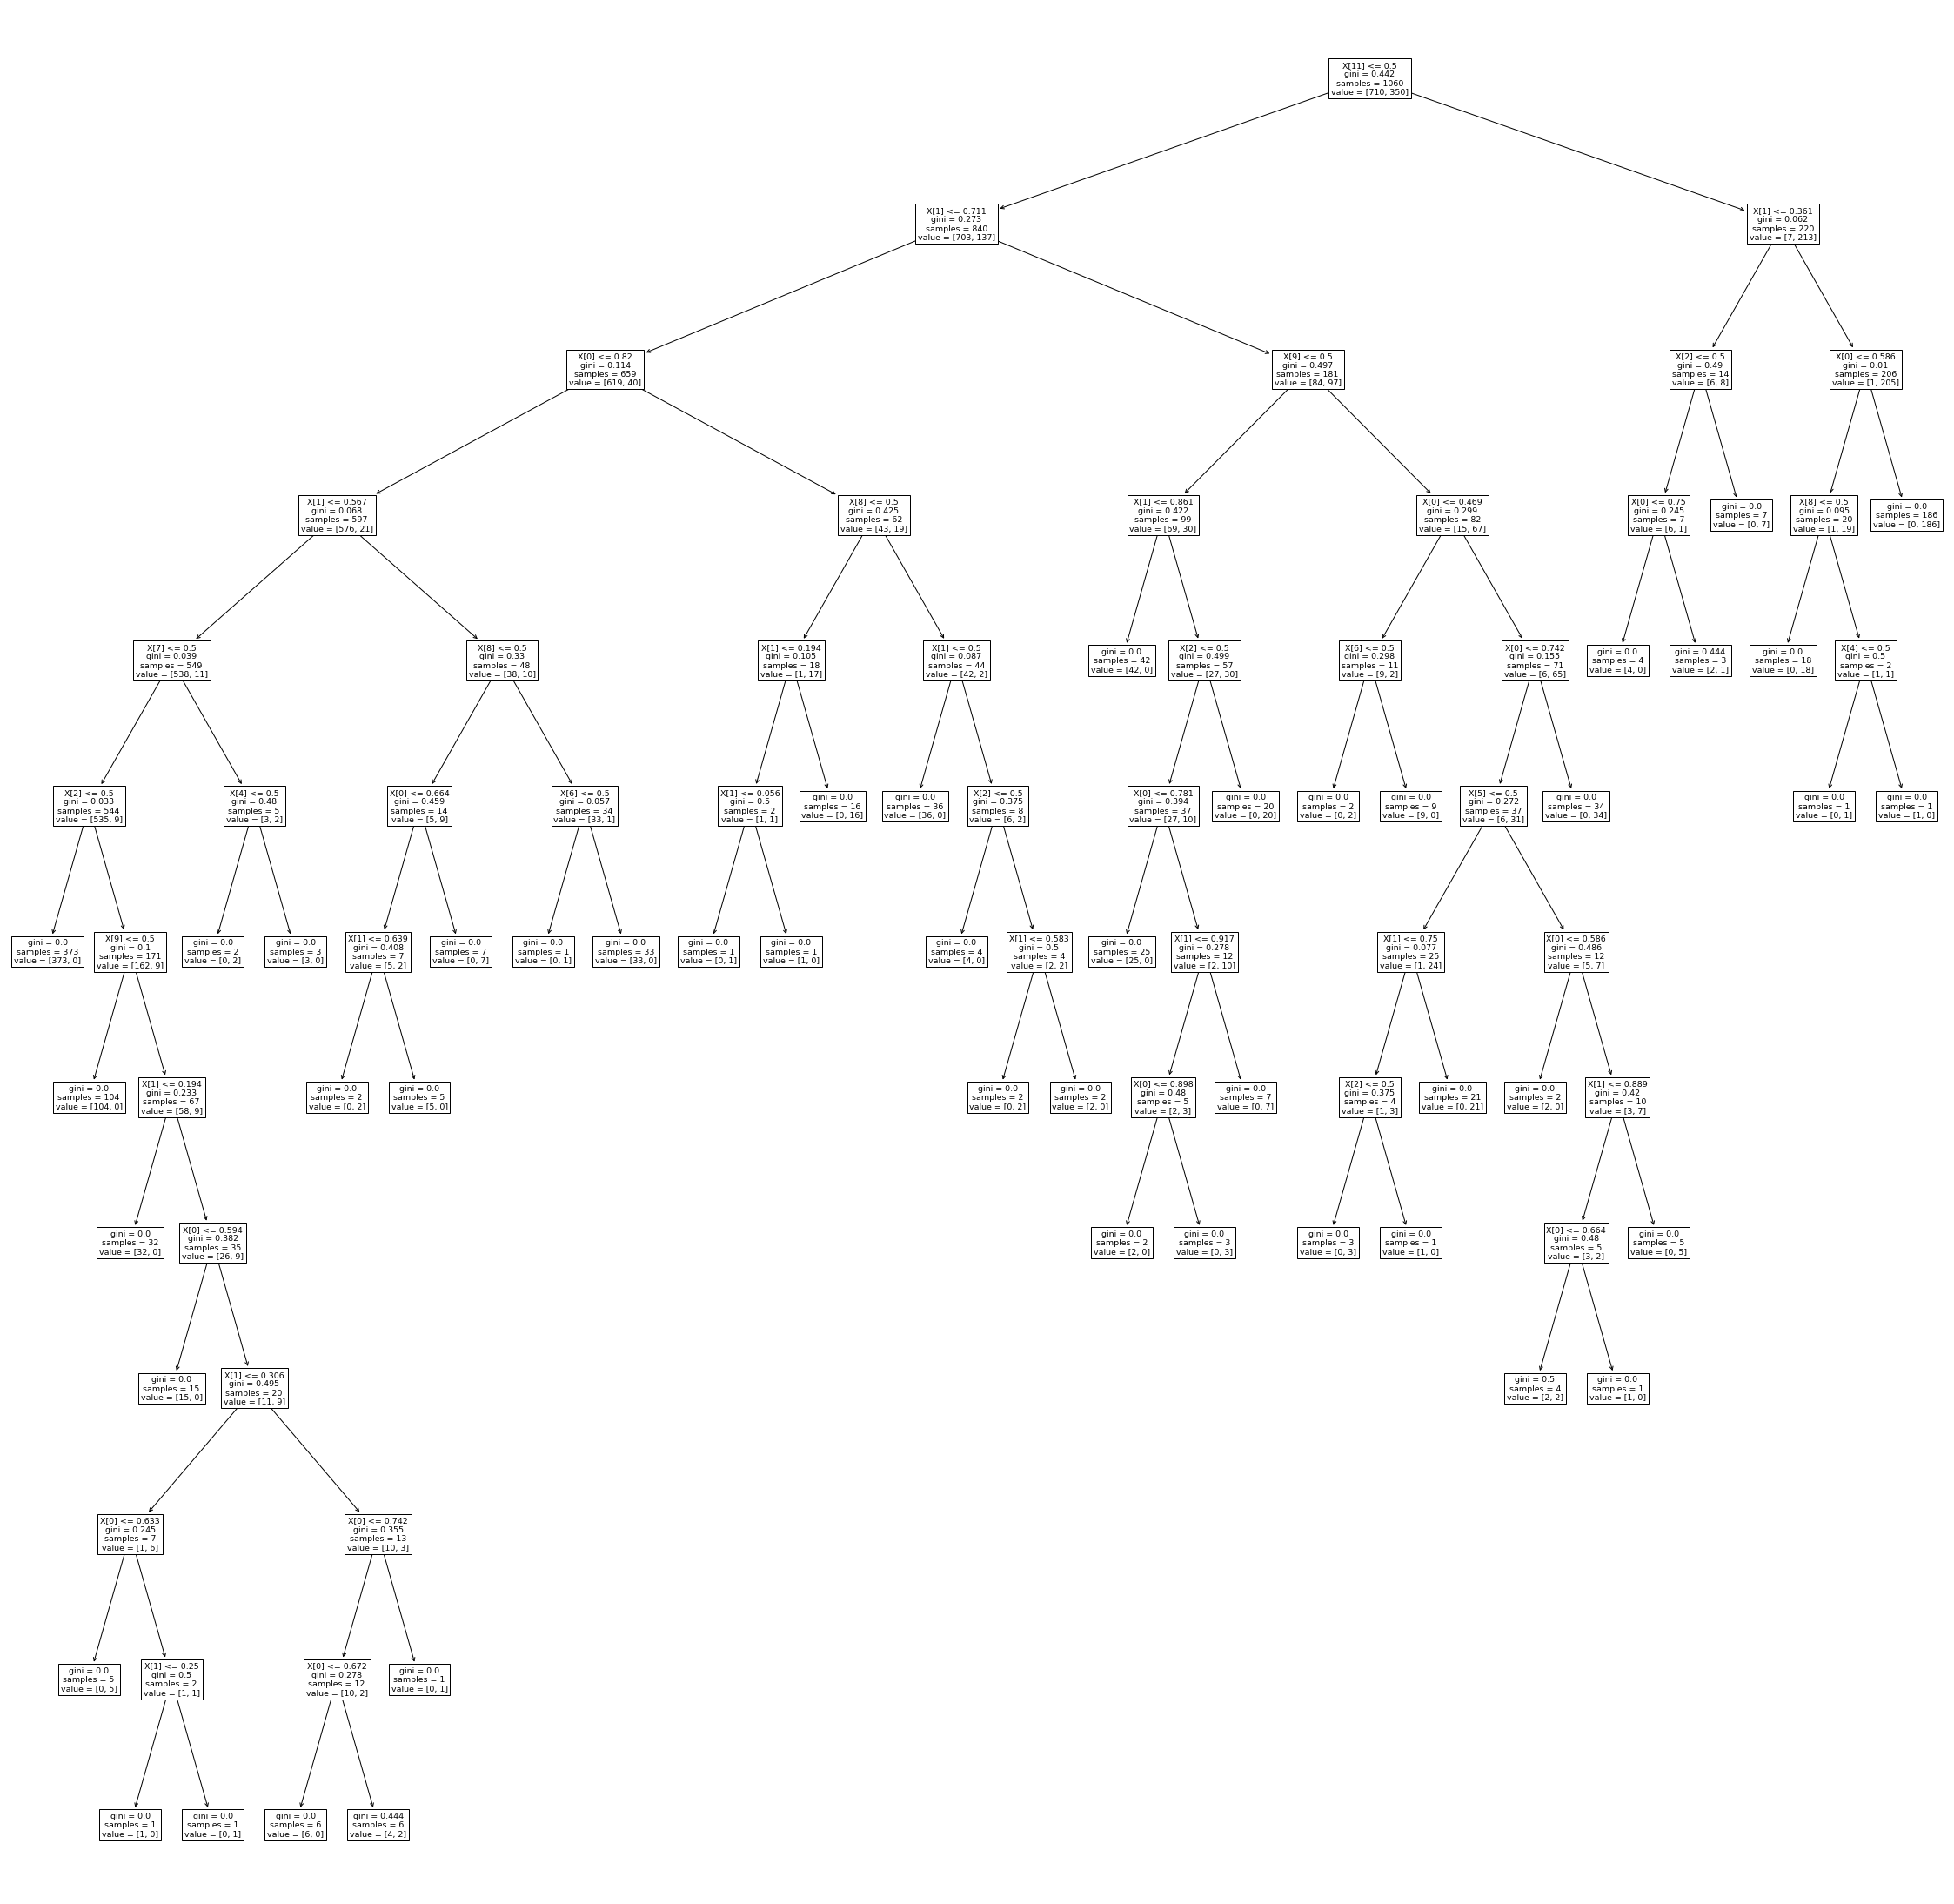

In [72]:
plot_tree(model2)

In [73]:
pred_y = model2.predict(X_test)

In [74]:
plt.rcParams["figure.figsize"] = (5 ,5)

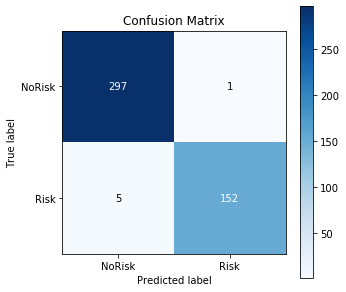

In [75]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    pred_y
)

In [76]:
acc = sklearn.metrics.accuracy_score(Y_test, pred_y, 
                                     normalize=True, sample_weight=None)
print("Decision Tree accuracy score:", acc)

Decision Tree accuracy score: 0.9868131868131869


# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(solver='lbfgs')

In [78]:
model3 = model3.fit(X_train, Y_train)

In [79]:
pred_y = model3.predict(X_test)

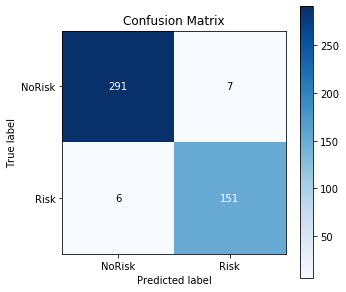

In [80]:
skplt.metrics.plot_confusion_matrix(
    Y_test,
    pred_y
)

In [81]:
acc = sklearn.metrics.accuracy_score(Y_test, pred_y, 
                               normalize=True, sample_weight=None)
print("Logistic Regression accuracy score:", acc)

Logistic Regression accuracy score: 0.9714285714285714
